# Help Notebook

This notebook is designed to help the user when working with my package.

# The data class

Firstly you have to import the required libraries, given by:

In [156]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import importlib


And then you can import the class:

In [157]:
import data_module
from data_module import Data
importlib.reload(data_module)

<module 'data_module' from 'c:\\Users\\sarah\\Documents\\intermediate-computing\\Assessment2\\data_module.py'>

Then you have to import your chosen data and create a dictionary out of the data:

In [158]:
#reading in the data for mhd
mhd_ch4 = pd.read_csv('data/mhd_ch4.csv')
mhd_co2= pd.read_csv('data/mhd_co2.csv')
mhd_n2o = pd.read_csv('data/mhd_n2o.csv')

#reading in data for tac
tac_ch4 = pd.read_csv('data/tac_ch4.csv')
tac_co2= pd.read_csv('data/tac_co2.csv')
tac_n2o = pd.read_csv('data/tac_n2o.csv')

#reading in species information
spec_info = pd.read_csv('data/species_info.csv')  
print(spec_info)
#creating dictionaries to make it easier to access data
tac_mhd = {'tac_ch4': tac_ch4, 'tac_co2': tac_co2, 'tac_n2o': tac_n2o, 'mhd_ch4':mhd_ch4, 'mhd_co2':mhd_co2, 'mhd_n2o':mhd_n2o}

  species scale units
0     co2  noaa   ppm
1     ch4   sio   ppb
2     n2o   sio   ppb


Then you have to input the dictionary and information csv file into the class.

In [159]:
data_tac_mhd = Data(tac_mhd,spec_info)

### Method: Metadata
This section is a guide on how to use the method named meta data in the class named data. In order to obtain a quick overview of a specific data set, simply call the user_metadata(*required file name*) method. 

In [160]:
#In this case we are calling the meta data for ch4 levels in tacolnestion, East Anglia.
data_tac_mhd.user_metadata('tac_ch4')


The location of this data set is Tacolneston, East Anglia.
The site code is TAC
The gas species is ch4 
The scale used is sio 
The units are ppb 


### Method: Running averge of one file

You can obtain the running average of one file by using the run_avg(timeframe) method. For the desired time frame you can do days, months or year.

In [161]:
#For a day
data_tac_mhd.run_avg('tac_ch4','day')

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [1976.6210897727271,
  1979.5726109848486,
  1971.4357479087453,
  1980.389134469697,
  1980.1912019011409,
  1979.9177174242425,
  1985.2186268939395,
  1971.9481171755724,
  1963.186102651515,
  1967.5793962765958,
  1964.4411355400696,
  1965.588973611111,
  1972.068631358885,
  1968.2852086805553,
  1980.2839344947733,
  1975.7373958333333,
  1987.4193461805557,
  1980.014336654804,
  1979.8732928030304,
  1981.9782477272727,
  1983.6721276515152,
  1976.4163323193916,
  1998.3382673003803,
  2017.3339511363636,
  1991.6859015564203,
  1975.96218313253,
  1982.2509880952382,
  1989.7061891666667,
  1979.660532894737,
  1986.7914928870293,
  1977.7612090277778])

In [162]:
#For a month
data_tac_mhd.run_avg('tac_ch4','month')

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [1985.9046106725145,
  2010.3086381954886,
  1971.5666198100407,
  1999.408970422535,
  1968.176138127544,
  1959.635047257384,
  1955.0737085597825,
  1961.5443444444443,
  1972.3616730452675,
  1985.7406047554348,
  1988.6131480842912,
  1997.6329892663043])

In [163]:
#For a year
data_tac_mhd.run_avg('tac_ch4','year')

([2019], [1979.678034916097])

As a note, when obtaining the running average for day, it takes the 1st day of each month average for day 1, therefore you obtain 31 elements. This is used more as a tool for analysing the structure of the month in general as opposed to how days vary across the year.

### Method: Plotting the running average for one file

You can plot the running average for one file by plot_run_avgs(file, timeframe) method as shown below. Plotting for the timeframe of year is redundent as there is only one value.

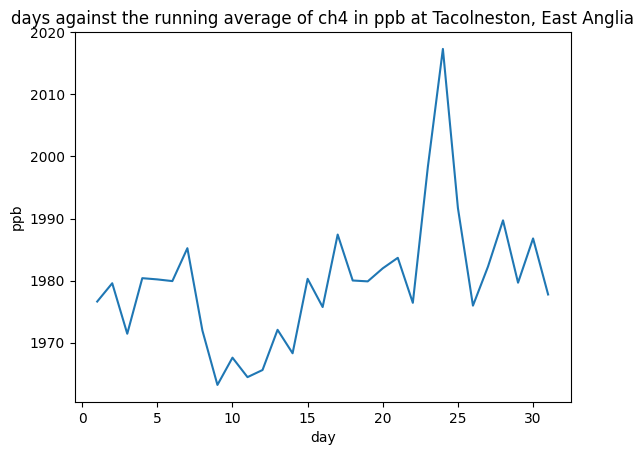

In [164]:
data_tac_mhd.plot_run_avgs('tac_ch4', 'day')

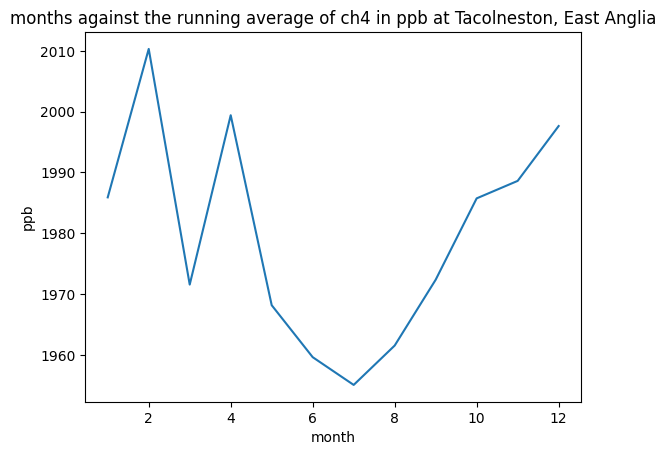

In [165]:
data_tac_mhd.plot_run_avgs('tac_ch4', 'month')

### Method: Finding the running average of two files

This method is called by run_avg_twovalues(file1, file2). It is demonstraited below.

In [166]:
data_tac_mhd.run_avg_2vals('tac_ch4', 'mhd_ch4')

(0      2019-01-01 00:00:00
 1      2019-01-01 01:00:00
 2      2019-01-01 02:00:00
 3      2019-01-01 03:00:00
 4      2019-01-01 04:00:00
                ...        
 8755   2019-12-31 19:00:00
 8756   2019-12-31 20:00:00
 8757   2019-12-31 21:00:00
 8758   2019-12-31 22:00:00
 8759   2019-12-31 23:00:00
 Name: time, Length: 8760, dtype: datetime64[ns],
 0       1949.6067
 1       1949.7004
 2       1950.2671
 3       1947.9426
 4       1950.5607
           ...    
 8755    1977.9932
 8756    2001.9976
 8757    1973.9342
 8758    2028.6688
 8759    2081.3855
 Name: mf, Length: 8760, dtype: float64,
 0      2019-01-01 01:00:00
 1      2019-01-01 02:00:00
 2      2019-01-01 03:00:00
 3      2019-01-01 04:00:00
 4      2019-01-01 05:00:00
                ...        
 8754   2019-12-31 19:00:00
 8755   2019-12-31 20:00:00
 8756   2019-12-31 21:00:00
 8757   2019-12-31 22:00:00
 8758   2019-12-31 23:00:00
 Name: time, Length: 8759, dtype: datetime64[ns],
 0       1922.4480
 1       1921.8

It returns 6 data frames: x1, y1, x2, y2, x3, y3, where x1 and y1 correspond to the x and y values of the first file inputted and x2 and y2 do the same thing respectively. Then x3 and y3 return the combined running average taken monthly of the two files.

### Method: Plotting two files agaisnt one another

You can also carry out operations on the data and plot the results. In the method m_vs_t(), you input your first chosen file name then your second chosen file name and also your desired time frame. It will plot one file agaisnt the other, and then it will also plot the running average of the two files combined defined by your time frame. At the moment this function can only take 'month' as a timeframe. The month time frame gives you the average across a given month. Year time frame is invalid as the data only spans a year.

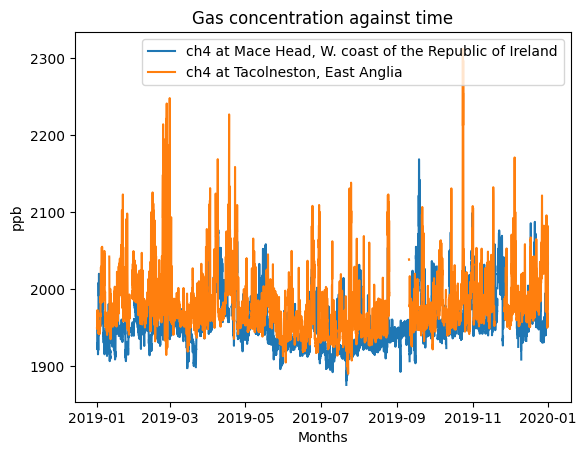

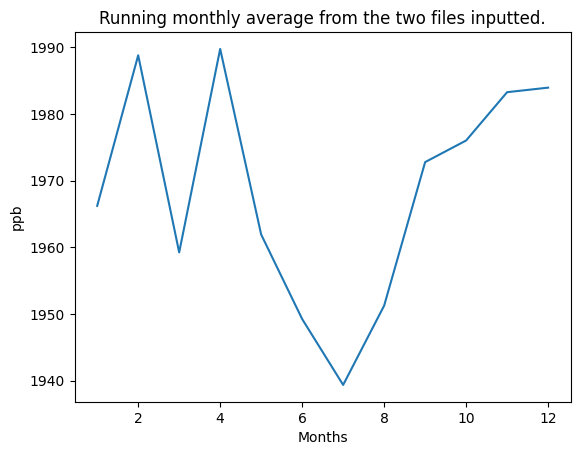

In [167]:
data_tac_mhd.m_vs_t('mhd_ch4', 'tac_ch4','day')

### Method: Linear fit

This method calculates a linear regression of the first order. It take parameters of filename, start month and end month. It then plots the results. It is demonstriated below.

c:\Users\sarah\Documents\intermediate-computing\Assessment2\data_module.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_final['pred_mf'] = model.predict(X)


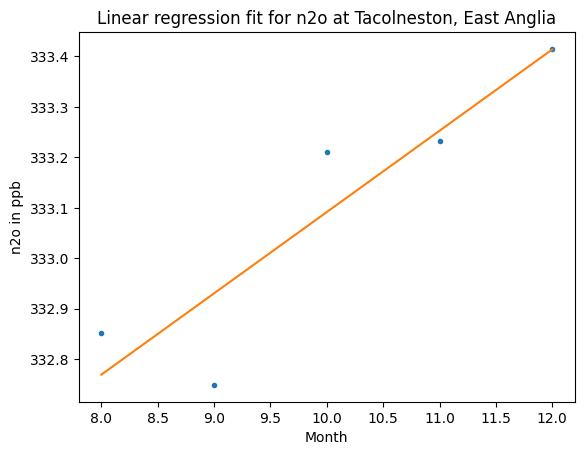

In [168]:
data_tac_mhd.linear_fit('tac_n2o', 8, 12)

### Method: Polynomial fit

This method calculates a polynomial fit of a given order. It take parameters of filename, start month and end month and order of a polnomial. It then plots the results. Admittedly it encapsulates the method linear_fit if you choose n=1, but it may be simpler for the user to understand if there are two separate methods. It is demonstriated below. 

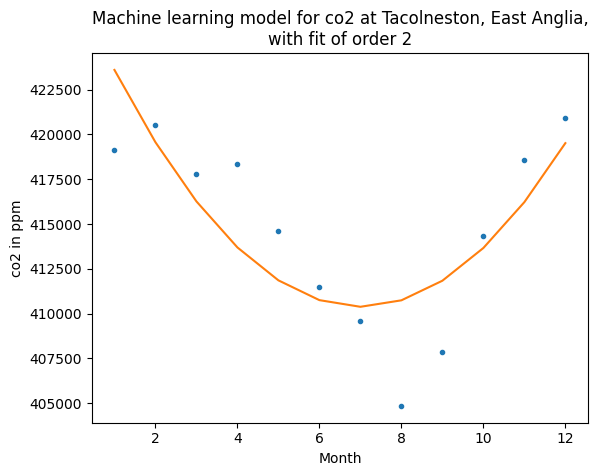

In [169]:
data_tac_mhd.poly_fit('tac_co2', 1, 12, 2)

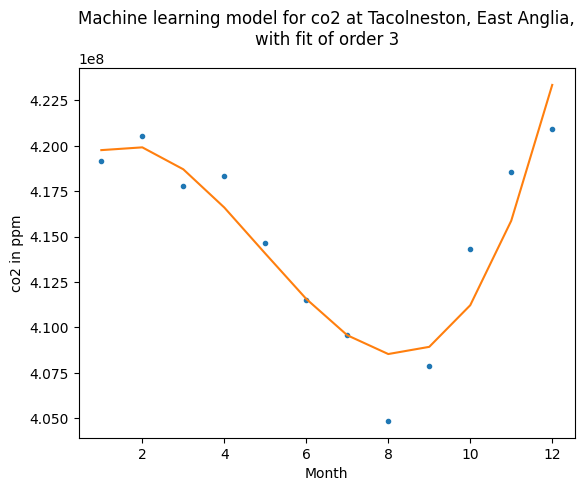

In [170]:
data_tac_mhd.poly_fit('tac_co2', 1, 12, 3)

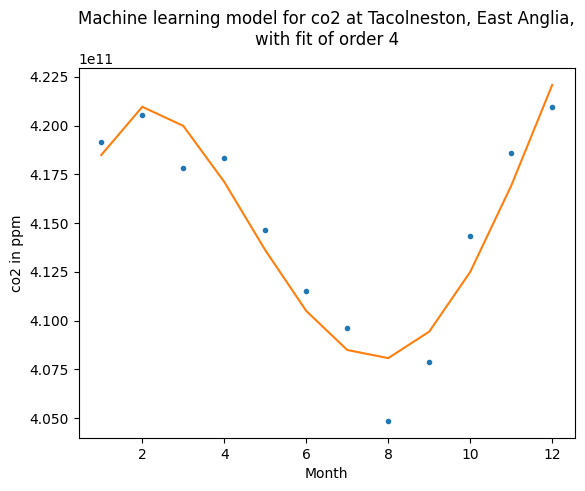

In [171]:
data_tac_mhd.poly_fit('tac_co2', 1, 12, 4)

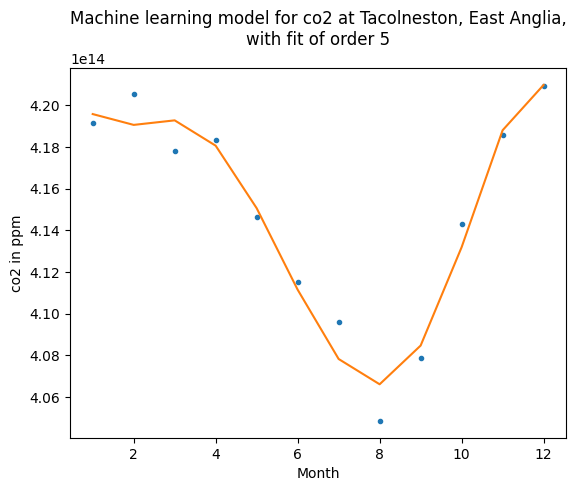

In [172]:
data_tac_mhd.poly_fit('tac_co2', 1, 12, 5)

I've notice that anything over order ~4 is encroaching upon overfitting terroitory, so the user should be aware of this danger. 